In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

c:\Users\DELL\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\__init__.py:177: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv("Sleep_Efficiency.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      452 non-null    int64  
 1   Age                     452 non-null    int64  
 2   Gender                  452 non-null    object 
 3   Bedtime                 452 non-null    object 
 4   Wakeup time             452 non-null    object 
 5   Sleep duration          452 non-null    float64
 6   Sleep efficiency        452 non-null    float64
 7   REM sleep percentage    452 non-null    int64  
 8   Deep sleep percentage   452 non-null    int64  
 9   Light sleep percentage  452 non-null    int64  
 10  Awakenings              432 non-null    float64
 11  Caffeine consumption    427 non-null    float64
 12  Alcohol consumption     438 non-null    float64
 13  Smoking status          452 non-null    object 
 14  Exercise frequency      446 non-null    fl

Changing the dtype of `bedtime` and `wakeuptime` from object to datatime

In [4]:
df["Bedtime"] = pd.to_datetime(df["Bedtime"])
df["Wakeup time"] = pd.to_datetime(df["Wakeup time"])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   ID                      452 non-null    int64         
 1   Age                     452 non-null    int64         
 2   Gender                  452 non-null    object        
 3   Bedtime                 452 non-null    datetime64[ns]
 4   Wakeup time             452 non-null    datetime64[ns]
 5   Sleep duration          452 non-null    float64       
 6   Sleep efficiency        452 non-null    float64       
 7   REM sleep percentage    452 non-null    int64         
 8   Deep sleep percentage   452 non-null    int64         
 9   Light sleep percentage  452 non-null    int64         
 10  Awakenings              432 non-null    float64       
 11  Caffeine consumption    427 non-null    float64       
 12  Alcohol consumption     438 non-null    float64   

Detecting and Treating missing values

In [6]:
df.isna().sum()

ID                         0
Age                        0
Gender                     0
Bedtime                    0
Wakeup time                0
Sleep duration             0
Sleep efficiency           0
REM sleep percentage       0
Deep sleep percentage      0
Light sleep percentage     0
Awakenings                20
Caffeine consumption      25
Alcohol consumption       14
Smoking status             0
Exercise frequency         6
dtype: int64

In [7]:
# Caffeine missing data percentage
c_m_per = df["Caffeine consumption"].isna().sum()/df["Caffeine consumption"].__len__()*100
f"{str(c_m_per)}% data misssing"

'5.530973451327434% data misssing'

In [8]:
# Awakening missing data percentage
a_m_per = df["Awakenings"].isna().sum()/df["Awakenings"].__len__()*100
f"{str(a_m_per)}% data misssing"

'4.424778761061947% data misssing'

In [9]:
# Alcohol consumption  missing data percentage
al_m_per = df["Alcohol consumption"].isna().sum()/df["Alcohol consumption"].__len__()*100
f"{str(al_m_per)}% data misssing"

'3.0973451327433628% data misssing'

In [10]:
al_m_per = df["Exercise frequency"].isna().sum()/df["Exercise frequency"].__len__()*100
f"{str(al_m_per)}% data misssing"

'1.3274336283185841% data misssing'

In [11]:
df[df["Caffeine consumption"].isna() | df["Alcohol consumption"].isnull() | df["Awakenings"].isnull()]

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
5,6,36,Female,2021-07-01 21:00:00,2021-07-01 04:30:00,7.5,0.90,23,60,17,0.0,NaN,0.0,No,1.0
19,20,52,Male,2021-12-03 00:30:00,2021-12-03 07:30:00,7.0,0.89,28,52,20,NaN,50.0,0.0,Yes,3.0
20,21,24,Male,2021-05-02 00:00:00,2021-05-02 08:00:00,8.0,0.83,15,75,10,3.0,0.0,NaN,No,2.0
24,25,24,Male,2021-09-16 00:00:00,2021-09-16 07:00:00,7.0,0.88,15,75,10,1.0,NaN,5.0,No,2.0
26,27,36,Female,2021-06-18 00:00:00,2021-06-18 07:00:00,7.0,0.95,28,55,17,0.0,NaN,0.0,No,1.0
37,38,20,Female,2021-09-05 00:00:00,2021-09-05 09:00:00,9.0,0.82,26,56,18,4.0,NaN,0.0,No,1.0
57,58,43,Male,2021-03-20 02:00:00,2021-03-20 09:30:00,7.5,0.91,23,58,19,1.0,NaN,0.0,Yes,3.0
60,61,32,Female,2021-06-11 02:30:00,2021-06-11 10:00:00,7.5,0.95,28,60,12,1.0,NaN,0.0,No,1.0
63,64,35,Female,2021-05-08 21:00:00,2021-05-08 04:30:00,7.5,0.93,28,55,17,1.0,NaN,0.0,No,1.0
64,65,30,Male,2021-04-24 01:30:00,2021-04-24 09:00:00,7.5,0.85,20,70,10,1.0,NaN,0.0,No,3.0


In [12]:
#Dectecting outliers before filling the values
df["Awakenings"].describe()

count    432.000000
mean       1.641204
std        1.356762
min        0.000000
25%        1.000000
50%        1.000000
75%        3.000000
max        4.000000
Name: Awakenings, dtype: float64

<Figure size 1000x1000 with 0 Axes>

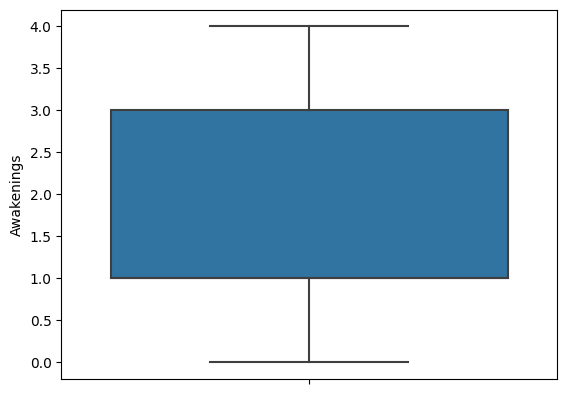

In [13]:
plt.figure(figsize=(10,10))
fig, ax = plt.subplots()
sns.boxplot(data=df,y="Awakenings")
plt.show()


In [14]:
df["Awakenings"].fillna(df["Awakenings"].mean(),inplace=True)
df["Awakenings"].isna().sum()

C:\Users\DELL\AppData\Local\Temp\ipykernel_8724\2020771275.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Awakenings"].fillna(df["Awakenings"].mean(),inplace=True)


0

In [15]:
df[df["Awakenings"].isnull()]

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency


In [16]:
df["Caffeine consumption"].describe()

count    427.000000
mean      23.653396
std       30.202785
min        0.000000
25%        0.000000
50%       25.000000
75%       50.000000
max      200.000000
Name: Caffeine consumption, dtype: float64

<AxesSubplot:ylabel='Caffeine consumption'>

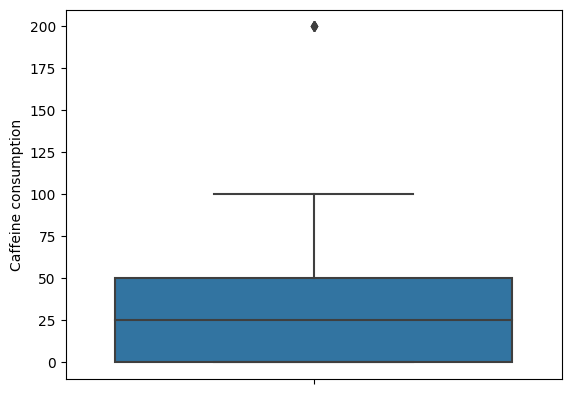

In [17]:
sns.boxplot(data=df, y="Caffeine consumption")

In [18]:
df[df["Caffeine consumption"]==200]

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
62,63,29,Male,2021-05-03 21:00:00,2021-05-03 05:00:00,8.0,0.81,15,67,18,1.0,200.0,0.0,No,NaN
81,82,29,Male,2021-07-11 21:00:00,2021-07-11 04:30:00,7.5,0.81,15,67,18,2.0,200.0,0.0,No,2.0
96,97,41,Male,2021-02-15 21:00:00,2021-02-15 04:00:00,7.0,0.96,28,55,17,0.0,200.0,0.0,No,3.0
161,162,42,Male,2021-11-06 21:00:00,2021-11-06 04:30:00,7.5,0.95,28,55,17,0.0,200.0,0.0,No,3.0


In [19]:
df.drop(df[df["Caffeine consumption"]==200]["Caffeine consumption"].index,inplace=True)

In [20]:
df[df["Caffeine consumption"]==200]

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency


In [21]:
df["Caffeine consumption"].fillna(df["Caffeine consumption"].mean(),inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_8724\2483737710.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Caffeine consumption"].fillna(df["Caffeine consumption"].mean(),inplace=True)


In [22]:
df["Caffeine consumption"].isnull().sum()

0

In [23]:
df["Alcohol consumption"].describe()

count    434.000000
mean       1.184332
std        1.624903
min        0.000000
25%        0.000000
50%        0.000000
75%        2.000000
max        5.000000
Name: Alcohol consumption, dtype: float64

<AxesSubplot:ylabel='Alcohol consumption'>

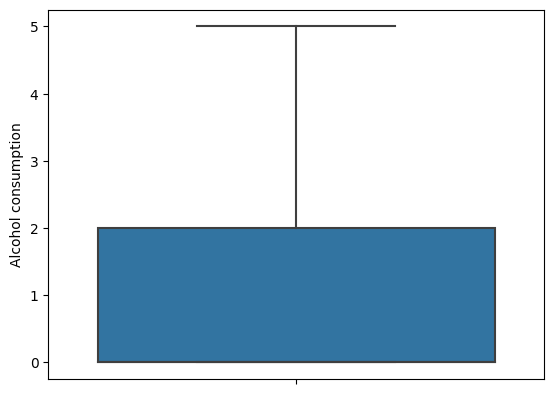

In [24]:
sns.boxplot(data=df, y="Alcohol consumption")

In [25]:
(df["Alcohol consumption"]==5.0).sum()/df["Alcohol consumption"].__len__()*100

6.696428571428571

In [26]:
(df["Alcohol consumption"]==2.0).sum()/df["Alcohol consumption"].__len__()*100

8.258928571428571

In [27]:
(df["Alcohol consumption"]==0.0).sum()/df["Alcohol consumption"].__len__()*100

54.01785714285714

In [28]:
df["Alcohol consumption"].fillna(0.0,inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_8724\1529824438.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Alcohol consumption"].fillna(0.0,inplace=True)


In [29]:
df["Alcohol consumption"].isnull().sum()

0

In [30]:
df[df["Exercise frequency"].isnull()]

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
33,34,37,Female,2021-11-28 00:30:00,2021-11-28 07:30:00,7.0,0.90,28,53,19,0.0,25.0,1.0,Yes,NaN
262,263,31,Female,2021-11-08 21:00:00,2021-11-08 06:00:00,9.0,0.76,23,60,17,4.0,50.0,0.0,No,NaN
304,305,25,Male,2021-05-01 00:00:00,2021-05-01 08:00:00,8.0,0.84,15,70,15,4.0,0.0,4.0,No,NaN
366,367,52,Male,2021-10-13 23:00:00,2021-10-13 07:00:00,8.0,0.82,20,70,10,3.0,75.0,0.0,No,NaN
446,447,23,Male,2021-04-21 00:00:00,2021-04-21 07:00:00,7.0,0.50,15,40,45,2.0,0.0,4.0,Yes,NaN


In [31]:
df["Exercise frequency"].describe()

count    443.000000
mean       1.785553
std        1.430618
min        0.000000
25%        0.000000
50%        2.000000
75%        3.000000
max        5.000000
Name: Exercise frequency, dtype: float64

In [32]:
(df["Exercise frequency"]<=3.0).sum()/df["Exercise frequency"].__len__()*100

87.94642857142857

In [33]:
df["Exercise frequency"].fillna(np.round(df[df["Exercise frequency"]<=3.0]["Exercise frequency"].mean()),inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_8724\4152119879.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Exercise frequency"].fillna(np.round(df[df["Exercise frequency"]<=3.0]["Exercise frequency"].mean()),inplace=True)


In [34]:
df["Exercise frequency"].isna().sum()

0

Outlier Detection and treating them.

In [78]:
import sklearn.preprocessing as skpre
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm,stats
import seaborn as sns

In [77]:
class emp_rule():
        def __init__(self,column:str,df:pd.DataFrame):
            self.column = column
            self.df = df
            self.data_fit()

        def data_fit(self):
            scalar = skpre.StandardScaler()
            scalar.fit(self.df[self.column].to_numpy().reshape(-1,1))
            self.mean = scalar.mean_
            self.std = scalar.scale_
            return scalar

        def data_transform(self,scalar):
            self.z_scores = scalar.transform(self.df[self.column].to_numpy().reshape(-1,1))
            self.z_scores_mean = self.z_scores.mean()
            self.z_scores_std =self.z_scores.std()

        def fit_emp_graph(self):
            std_1 = self.z_scores_mean+1*self.z_scores_std
            std_1_ = self.z_scores_mean-1*self.z_scores_std
            std_2 = self.z_scores_mean+2*self.z_scores_std
            std_2_ = self.z_scores_mean-2*self.z_scores_std 
            std_3 = self.z_scores_mean+3*self.z_scores_std
            std_3_ = self.z_scores_mean-3*self.z_scores_std

            self.per_0 = np.round(((self.z_scores>=std_1_) & (self.z_scores<=std_1)).sum()/self.z_scores.__len__()*100,2)
            self.per_1 = np.round(((self.z_scores>=std_2_) & (self.z_scores<=std_2)).sum()/self.z_scores.__len__()*100,2)
            self.per_2 = np.round(((self.z_scores>=std_3_) & (self.z_scores<=std_3)).sum()/self.z_scores.__len__()*100,2)


        def plot_emp_graph(self,ax,bin_val):
            ax[0].hist(self.z_scores,bins=bin_val,density=True)
            for i in range(-2,3,1):
                x = 0 + i * 1
                y = 1/(self.z_scores_std*(np.sqrt(2*np.pi))*(np.exp((x-self.z_scores_mean)**2/2*self.z_scores_std**2)))
                ax[0].plot([x,x],[0,y],linestyle="--",alpha = 0.5,color = 'r')
                ax[0].annotate(f"{getattr(self,'per_'+str(abs(i)))}%",xy=(x,y),xytext=(x-0.1,y+0.01),fontsize=8,color='r')
            ax[1].hist(self.df[self.column],bins=bin_val,density=True)
            values = np.linspace(self.df[self.column].min(),self.df[self.column].max(),100)
            pd = norm.pdf(values,loc=self.df[self.column].mean(),scale=self.df[self.column].std())
            ax[1].plot(values,pd)


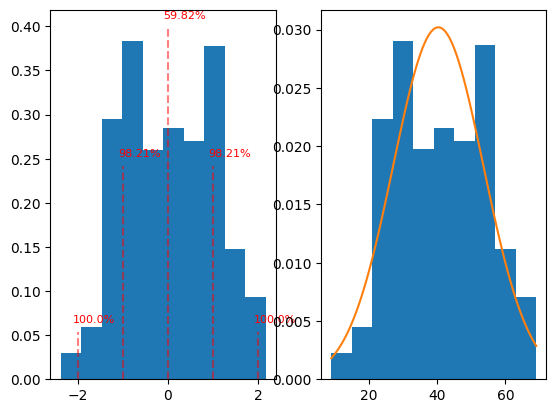

In [127]:
fig,ax = plt.subplots(1,2)
age = emp_rule("Age",df)
s_age = age.data_fit()
age.data_transform(s_age)
age.fit_emp_graph()
age.plot_emp_graph(ax,10)

In [52]:
age_quatiles = []
for i in range(1,101):
    age_quatiles.append(np.percentile(df["Age"].sort_values(),i))

In [93]:
samples = np.random.normal(loc=0,scale=1,size=1000)
sorted_samples = sorted(samples)

In [94]:
sample_quatiles = []
for i in range(1,101):
    sample_quatiles.append(np.percentile(sorted_samples,i))

<AxesSubplot:>

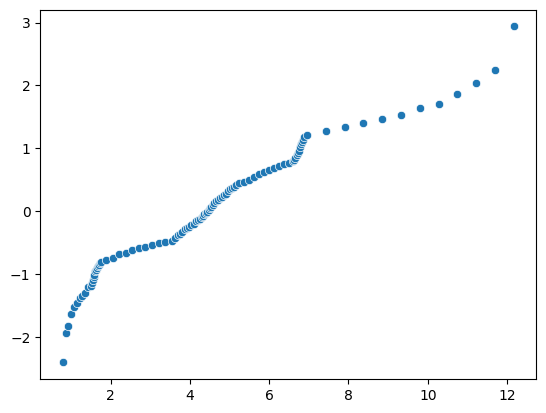

In [135]:
sns.scatterplot(x=x_quatiles,y=sample_quatiles)

<AxesSubplot:>

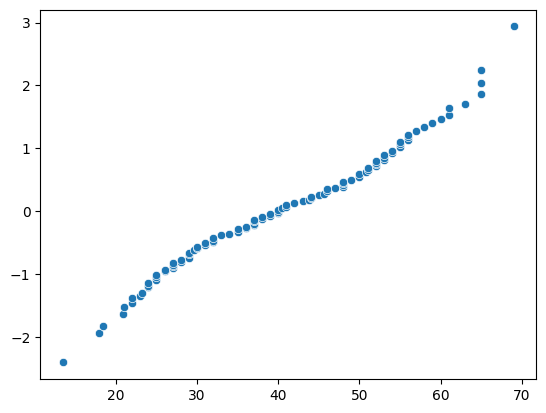

In [95]:
sns.scatterplot(x=age_quatiles,y=sample_quatiles)

In [96]:
np.corrcoef(sample_quatiles,age_quatiles)*100

array([[100.        ,  98.90767998],
       [ 98.90767998, 100.        ]])

In [115]:
stats.kurtosis(df["Age"])

C:\Users\DELL\AppData\Local\Temp\ipykernel_8724\2930871627.py:1: DeprecationWarning: Please use `kurtosis` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  stats.kurtosis(df["Age"])


-0.9549694862684603

In [98]:
df["Age"].skew()

0.03246332565102047

In [ ]:
df["Age"].describe()

count    448.000000
mean      40.330357
std       13.209134
min        9.000000
25%       29.000000
50%       40.000000
75%       52.000000
max       69.000000
Name: Age, dtype: float64

Conclusion of Age Column is there are no outiers.

(array([ 11.,  34., 153.,  86., 130.,  26.,   8.]),
 array([ 5.        ,  5.71428571,  6.42857143,  7.14285714,  7.85714286,
         8.57142857,  9.28571429, 10.        ]),
 <BarContainer object of 7 artists>)

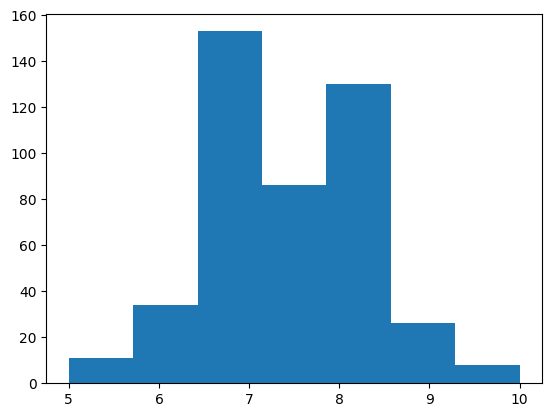

In [126]:
#sleep Duration
plt.hist(df["Sleep duration"],bins=7)

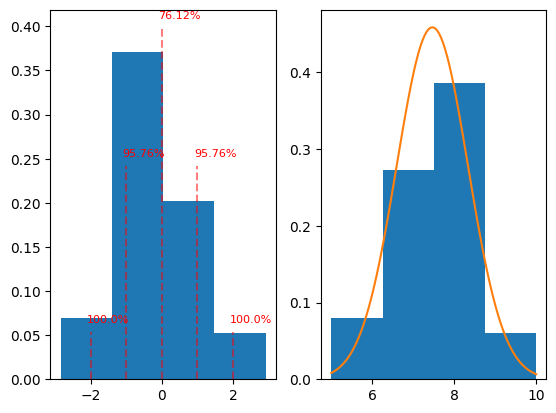

In [111]:
fig,ax = plt.subplots(1,2)
sd = emp_rule("Sleep duration",df)
s_sd = age.data_fit()
sd.data_transform(s_age)
sd.fit_emp_graph()
sd.plot_emp_graph(ax,4)

In [102]:
sd_quatiles=[]
for i in range(1,101):
    sd_quatiles.append(np.percentile(df["Sleep duration"].sort_values(),i))

In [103]:
sample_quatiles

[-2.4088371318163286,
 -1.9391635936613412,
 -1.8236057984247798,
 -1.6361948138920444,
 -1.5198864193438626,
 -1.456240132970383,
 -1.381631696701546,
 -1.345214748464689,
 -1.295395240197092,
 -1.2157000575127137,
 -1.1927889305136306,
 -1.1403634651038046,
 -1.1037388606429994,
 -1.0504586096308512,
 -1.0211230560946583,
 -0.9574442742462551,
 -0.9329601554443145,
 -0.8984933550676131,
 -0.8804078771739816,
 -0.858096817471477,
 -0.8277406172649179,
 -0.8085554334375396,
 -0.7799740123255919,
 -0.7390686635786975,
 -0.6896944315362499,
 -0.6655296747130964,
 -0.6252294145825397,
 -0.5929581926358596,
 -0.5660857547136976,
 -0.5426247193006151,
 -0.515071856158733,
 -0.49224218702338146,
 -0.47240348840733865,
 -0.43289681292753524,
 -0.38537534649297595,
 -0.36588421583239206,
 -0.3343851805013046,
 -0.28916522666878003,
 -0.270572526248294,
 -0.25685444284669456,
 -0.2185151051276837,
 -0.20544020438967361,
 -0.16476360135790782,
 -0.14516867442207057,
 -0.12185367418502009,
 -0.09

<AxesSubplot:>

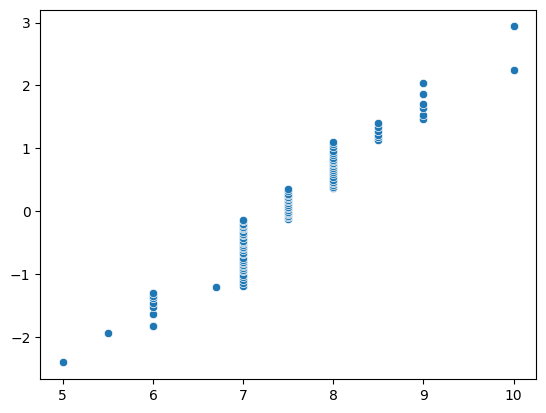

In [112]:
sns.scatterplot(x=sd_quatiles,y=sample_quatiles)

In [113]:
np.corrcoef(sd_quatiles,sample_quatiles)

array([[1.        , 0.96481199],
       [0.96481199, 1.        ]])

In [114]:
stats.kurtosis(df["Sleep duration"])

C:\Users\DELL\AppData\Local\Temp\ipykernel_8724\488339725.py:1: DeprecationWarning: Please use `kurtosis` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  stats.kurtosis(df["Sleep duration"])


0.9910983935985702

In [ ]:
df["Sleep duration"].describe()

count    448.000000
mean       7.465402
std        0.869845
min        5.000000
25%        7.000000
50%        7.500000
75%        8.000000
max       10.000000
Name: Sleep duration, dtype: float64

Conclusion of sleep duration column: there exists no outliers

In [ ]:
df.head(4)

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0
